# Understanding Green AI
### DAMI II HT2023 COURSE PROJECT

The project uses Convolutional Neural Networks (CNNs) for classification of the [MNIST](https://www.kaggle.com/datasets/hojjatk/mnist-dataset) dataset. It explores how factors such as hardware, deep learning frameworks, computing resources, and network architecture can affect the environmental impact of training deep learning models. Energy and carbon footprint are tracked using [Codecarbon](https://github.com/mlco2/codecarbon).

#### Code imports

In [51]:
from numpy import mean
from numpy import std
import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras import backend as K
from keras import layers
from codecarbon import track_emissions
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import re

#### MNIST Dataset

In [2]:
# The dataset is available via the Keras library
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


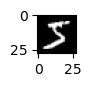

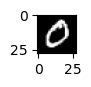

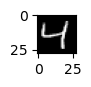

In [4]:
# Examples of the data available
for i in range(3): 
    plt.figure(figsize=(0.5,0.5)) 
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

## CNNs for classification in the MNIST Dataset

#### CNN Network Architecture used for classification of the MNIST dataset
The architecture is inspired by this [tutorial](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/). Changes were made to the tutorial code. For instance, [Keras3](https://keras.io/keras_3/) not Keras2 has been used because ony Keras3 has the multi-backend support needed to test emissions with both tensorflow and pytorch; in each experiment there is a replication factor of three to account for the statistical variability of the results. In this section an overview of the model and its parameters is provided using Keras model.summary() and the application [Netron](https://github.com/lutzroeder/netron).


In [5]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) 
model.add(BatchNormalization()) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform')) 
model.add(BatchNormalization()) 
model.add(layers.Dense(10, activation='softmax')) 
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9) 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()
#visualkeras.layered_view(model, to_file='output.png').show()
model.save('mnist_cnn.keras') 

/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 26, 26, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 5408)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 100)               │    540,900 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 100)               │        400 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │      1,010 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 542,758 (2.07 MB)

 Trainable params: 542,494 (2.07 MB)

 Non-trainable params: 264 (1.03 KB)

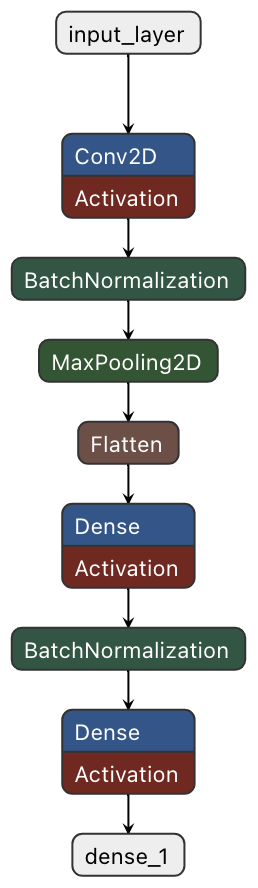

In [6]:
from IPython import display
display.Image("mnist_cnn.png")

## 1 - Hardware: CPU

It was not possible to check the CNN model on a GPU locally, because the tracking tool Codecarbon only supports Intel chips, which are not available on the newer generation of MacBooks provided with GPU. The older Macbook with an Intel chip used to prepare and run the code has no GPU.

In [7]:
# Where not differently indicated (Section 4) Tensorflow is the backend used for Keras3.
print(K.backend())

tensorflow


[codecarbon INFO @ 16:56:23] offline tracker init
[codecarbon INFO @ 16:56:23] [setup] RAM Tracking...
[codecarbon INFO @ 16:56:23] [setup] GPU Tracking...
[codecarbon INFO @ 16:56:23] No GPU found.
[codecarbon INFO @ 16:56:23] [setup] CPU Tracking...
[codecarbon WARNING @ 16:56:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:56:25] We saw that you have a Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:56:25] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
[codecarbon INFO @ 16:56:25] >>> Tracker's metadata:
[codecarbon INFO @ 16:56:25]   Platform system: macOS-11.6.5-x86_64-i386-64bit
[codecarbon INFO @ 16:56:25]   Python version: 3.11.0
[codecarbon INFO @ 16:56:25]   CodeCarbon version: 2.3.2
[codecarbon INFO @ 16:56:25]   Available RAM : 8.000 GB
[codecarbon INFO @ 16:56:25]   CPU count: 4
[codecarbon INFO @ 16:56:25]   CPU model: Intel(R) Core(TM) i5-

Epoch 1/3


[codecarbon INFO @ 16:56:40] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:56:40] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:56:40] 0.000190 kWh of electricity used since the beginning.


1250/1250 - 18s - 15ms/step - accuracy: 0.9516 - loss: 0.1621 - val_accuracy: 0.9706 - val_loss: 0.0977
Epoch 2/3


[codecarbon INFO @ 16:56:55] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:56:55] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:56:55] 0.000379 kWh of electricity used since the beginning.


1250/1250 - 17s - 14ms/step - accuracy: 0.9809 - loss: 0.0639 - val_accuracy: 0.9794 - val_loss: 0.0690
Epoch 3/3


[codecarbon INFO @ 16:57:10] Energy consumed for RAM : 0.000037 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:57:10] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:57:10] 0.000569 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9737 - val_loss: 0.0863
625/625 - 2s - 3ms/step - accuracy: 0.9737 - loss: 0.0863
> 97.370
Epoch 1/3


[codecarbon INFO @ 16:57:25] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:57:25] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:57:25] 0.000758 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9533 - loss: 0.1543 - val_accuracy: 0.9634 - val_loss: 0.1191
Epoch 2/3


[codecarbon INFO @ 16:57:40] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:57:40] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:57:40] 0.000948 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:57:55] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:57:55] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:57:55] 0.001137 kWh of electricity used since the beginning.


1250/1250 - 20s - 16ms/step - accuracy: 0.9810 - loss: 0.0607 - val_accuracy: 0.9615 - val_loss: 0.1263
Epoch 3/3


[codecarbon INFO @ 16:58:10] Energy consumed for RAM : 0.000087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:58:10] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:58:10] 0.001327 kWh of electricity used since the beginning.


1250/1250 - 17s - 14ms/step - accuracy: 0.9882 - loss: 0.0397 - val_accuracy: 0.9835 - val_loss: 0.0590
625/625 - 2s - 3ms/step - accuracy: 0.9835 - loss: 0.0590
> 98.350
Epoch 1/3


[codecarbon INFO @ 16:58:25] Energy consumed for RAM : 0.000100 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:58:25] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:58:25] 0.001517 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9546 - loss: 0.1556 - val_accuracy: 0.9748 - val_loss: 0.0818
Epoch 2/3


[codecarbon INFO @ 16:58:40] Energy consumed for RAM : 0.000112 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:58:40] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:58:40] 0.001706 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9824 - loss: 0.0613 - val_accuracy: 0.9748 - val_loss: 0.0827
Epoch 3/3


[codecarbon INFO @ 16:58:55] Energy consumed for RAM : 0.000125 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:58:55] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:58:55] 0.001896 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9876 - loss: 0.0425 - val_accuracy: 0.9793 - val_loss: 0.0667


[codecarbon INFO @ 16:59:10] Energy consumed for RAM : 0.000137 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:59:10] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:59:10] 0.002085 kWh of electricity used since the beginning.


625/625 - 2s - 3ms/step - accuracy: 0.9793 - loss: 0.0667
> 97.925


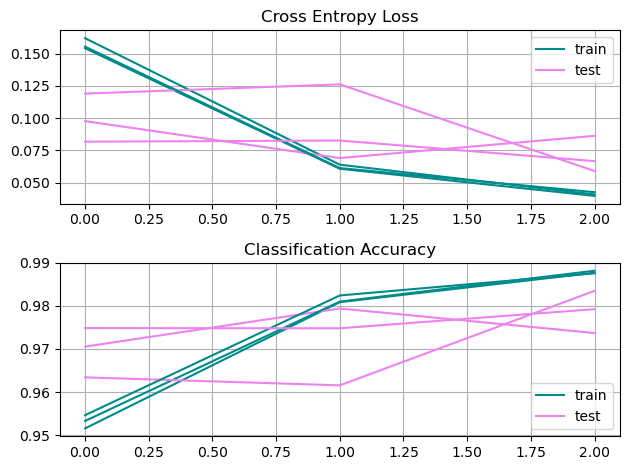

Accuracy: mean=97.882 std=0.401, n=3


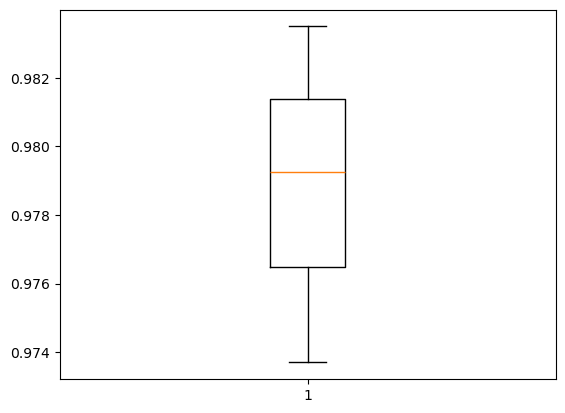

[codecarbon INFO @ 16:59:11] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:59:11] Energy consumed for RAM : 0.000138 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:59:11] Energy consumed for all CPUs : 0.001959 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:59:11] 0.002097 kWh of electricity used since the beginning.
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/codecarbon/output.py:168: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(data.values)])])
[codecarbon INFO @ 16:59:11] Done!

[codecarbon INFO @ 16:59:11] offline tracker init
[codecarbon INFO @ 16:59:11] [setup] RAM Tracking...
[codecarbon INFO @ 16:5

Epoch 1/3


[codecarbon INFO @ 16:59:28] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:59:28] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:59:28] 0.000190 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9525 - loss: 0.1606 - val_accuracy: 0.9692 - val_loss: 0.0994
Epoch 2/3


[codecarbon INFO @ 16:59:43] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:59:43] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:59:43] 0.000379 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9810 - loss: 0.0632 - val_accuracy: 0.9797 - val_loss: 0.0689
Epoch 3/3


[codecarbon INFO @ 16:59:58] Energy consumed for RAM : 0.000037 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 16:59:58] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:59:58] 0.000569 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9828 - val_loss: 0.0579
625/625 - 2s - 3ms/step - accuracy: 0.9828 - loss: 0.0579
> 98.280
Epoch 1/3


[codecarbon INFO @ 17:00:13] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:00:13] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:00:13] 0.000758 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9541 - loss: 0.1542 - val_accuracy: 0.9748 - val_loss: 0.0866
Epoch 2/3


[codecarbon INFO @ 17:00:28] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:00:28] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:00:28] 0.000948 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9818 - loss: 0.0601 - val_accuracy: 0.9815 - val_loss: 0.0643
Epoch 3/3


[codecarbon INFO @ 17:00:43] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:00:43] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:00:43] 0.001137 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:00:58] Energy consumed for RAM : 0.000087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:00:58] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:00:58] 0.001327 kWh of electricity used since the beginning.


1250/1250 - 16s - 13ms/step - accuracy: 0.9886 - loss: 0.0382 - val_accuracy: 0.9776 - val_loss: 0.0802
625/625 - 2s - 3ms/step - accuracy: 0.9776 - loss: 0.0802
> 97.765
Epoch 1/3


[codecarbon INFO @ 17:01:13] Energy consumed for RAM : 0.000100 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:01:13] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:01:13] 0.001517 kWh of electricity used since the beginning.


1250/1250 - 18s - 15ms/step - accuracy: 0.9499 - loss: 0.1642 - val_accuracy: 0.9740 - val_loss: 0.0886
Epoch 2/3


[codecarbon INFO @ 17:01:28] Energy consumed for RAM : 0.000112 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:01:28] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:01:28] 0.001706 kWh of electricity used since the beginning.


1250/1250 - 16s - 13ms/step - accuracy: 0.9802 - loss: 0.0670 - val_accuracy: 0.9801 - val_loss: 0.0643
Epoch 3/3


[codecarbon INFO @ 17:01:43] Energy consumed for RAM : 0.000125 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:01:43] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:01:43] 0.001896 kWh of electricity used since the beginning.


1250/1250 - 16s - 13ms/step - accuracy: 0.9862 - loss: 0.0440 - val_accuracy: 0.9784 - val_loss: 0.0752
625/625 - 2s - 3ms/step - accuracy: 0.9784 - loss: 0.0752
> 97.840


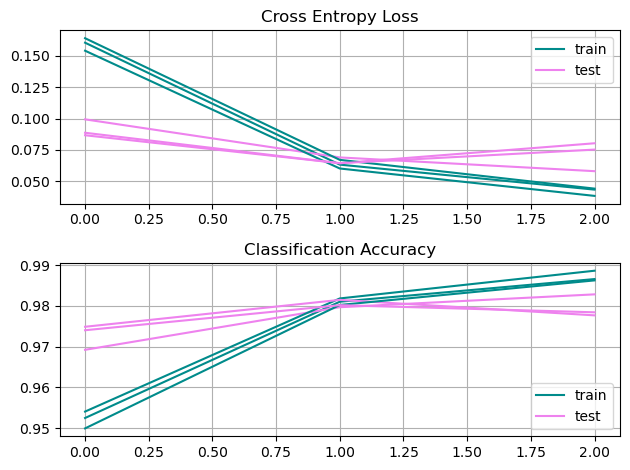

Accuracy: mean=97.962 std=0.227, n=3


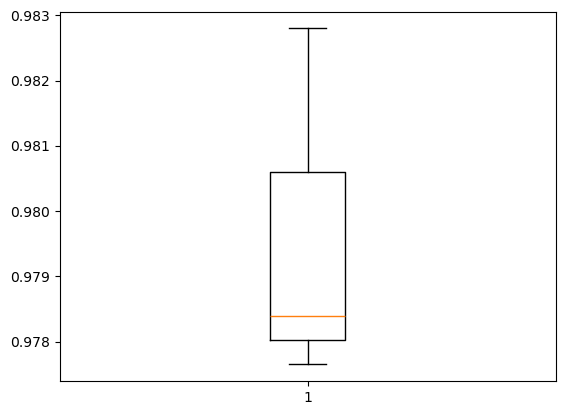

[codecarbon INFO @ 17:01:54] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:01:54] Energy consumed for RAM : 0.000134 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:01:54] Energy consumed for all CPUs : 0.001899 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:01:54] 0.002033 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:01:54] Done!

[codecarbon INFO @ 17:01:54] offline tracker init
[codecarbon INFO @ 17:01:54] [setup] RAM Tracking...
[codecarbon INFO @ 17:01:54] [setup] GPU Tracking...
[codecarbon INFO @ 17:01:54] No GPU found.
[codecarbon INFO @ 17:01:54] [setup] CPU Tracking...
[codecarbon WARNING @ 17:01:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 17:01:55] We saw that you have a Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:01:55] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-7360U C

Epoch 1/3


[codecarbon INFO @ 17:02:10] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:02:10] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:02:10] 0.000190 kWh of electricity used since the beginning.


1250/1250 - 19s - 15ms/step - accuracy: 0.9535 - loss: 0.1581 - val_accuracy: 0.9707 - val_loss: 0.1000
Epoch 2/3


[codecarbon INFO @ 17:02:25] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:02:25] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:02:25] 0.000379 kWh of electricity used since the beginning.


1250/1250 - 17s - 14ms/step - accuracy: 0.9809 - loss: 0.0645 - val_accuracy: 0.9797 - val_loss: 0.0695
Epoch 3/3


[codecarbon INFO @ 17:02:40] Energy consumed for RAM : 0.000038 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:02:40] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:02:40] 0.000569 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9883 - loss: 0.0409 - val_accuracy: 0.9825 - val_loss: 0.0634
625/625 - 2s - 3ms/step - accuracy: 0.9825 - loss: 0.0634
> 98.245
Epoch 1/3


[codecarbon INFO @ 17:02:55] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:02:55] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:02:55] 0.000758 kWh of electricity used since the beginning.


1250/1250 - 18s - 15ms/step - accuracy: 0.9509 - loss: 0.1656 - val_accuracy: 0.9711 - val_loss: 0.0989
Epoch 2/3


[codecarbon INFO @ 17:03:10] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:03:10] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:03:10] 0.000948 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:03:25] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:03:25] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:03:25] 0.001138 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9816 - loss: 0.0618 - val_accuracy: 0.9565 - val_loss: 0.1487
Epoch 3/3


[codecarbon INFO @ 17:03:40] Energy consumed for RAM : 0.000087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:03:40] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:03:40] 0.001327 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9881 - loss: 0.0405 - val_accuracy: 0.9804 - val_loss: 0.0656
625/625 - 2s - 3ms/step - accuracy: 0.9804 - loss: 0.0656
> 98.040
Epoch 1/3


[codecarbon INFO @ 17:03:55] Energy consumed for RAM : 0.000100 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:03:55] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:03:55] 0.001517 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9482 - loss: 0.1744 - val_accuracy: 0.9720 - val_loss: 0.0950
Epoch 2/3


[codecarbon INFO @ 17:04:10] Energy consumed for RAM : 0.000112 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:04:10] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:04:10] 0.001706 kWh of electricity used since the beginning.


1250/1250 - 16s - 13ms/step - accuracy: 0.9786 - loss: 0.0708 - val_accuracy: 0.9771 - val_loss: 0.0792
Epoch 3/3


[codecarbon INFO @ 17:04:25] Energy consumed for RAM : 0.000125 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:04:25] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:04:25] 0.001896 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9866 - loss: 0.0450 - val_accuracy: 0.9801 - val_loss: 0.0667
625/625 - 2s - 3ms/step - accuracy: 0.9801 - loss: 0.0667
> 98.015


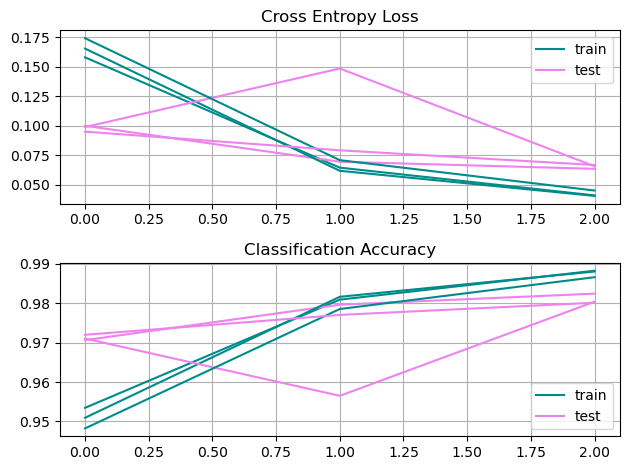

Accuracy: mean=98.100 std=0.103, n=3


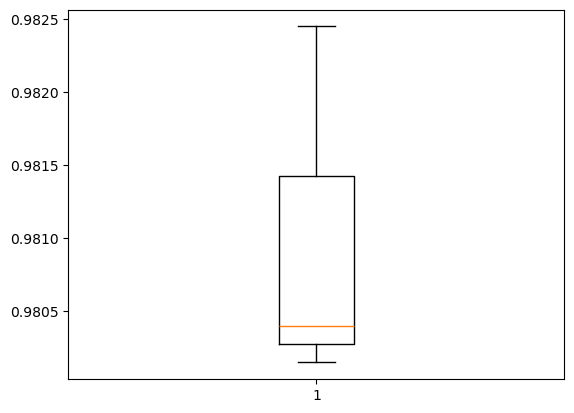

[codecarbon INFO @ 17:04:38] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:04:38] Energy consumed for RAM : 0.000135 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:04:38] Energy consumed for all CPUs : 0.001916 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:04:38] 0.002051 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:04:38] Done!



In [8]:
# cnn model with batch normalization for mnist

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=3):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=42)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=3, batch_size=32, validation_data=(testX, testY), verbose=2)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=2)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.tight_layout()
		plt.subplot(2, 1, 1)
		plt.grid()
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_loss'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="upper right")
		
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.grid()
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="lower right")
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# save model performance to file
def save_performance_to_csv(scores):
	# print summary
	with open ("accuracy_scores.csv",'a') as f:
		data = ["DAMI II Project CPU TF", round(mean(scores)*100, 3), round(std(scores)*100, 3)]
		writer = csv.writer(f)
		writer.writerow(data)


# run the test harness for evaluating a model
# Codecarbon can be used as a function decorator to track energy consumption and CO2Eq emissions when running the function
@track_emissions(offline=True, country_iso_code="ITA", project_name = "DAMI II Project CPU TF")
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
	# print accuracy scores to csv
	save_performance_to_csv(scores)

# run the test harness three times
i=0
while i<3:
	run_test_harness()
	i+=1


## 2 - Network Architecture

From the original CNN network architecture, the two batch normalization layers were removed and tested on CPU with tensorflow backend. 

[codecarbon INFO @ 17:04:38] offline tracker init
[codecarbon INFO @ 17:04:38] [setup] RAM Tracking...
[codecarbon INFO @ 17:04:38] [setup] GPU Tracking...
[codecarbon INFO @ 17:04:38] No GPU found.
[codecarbon INFO @ 17:04:38] [setup] CPU Tracking...
[codecarbon WARNING @ 17:04:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 17:04:40] We saw that you have a Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:04:40] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
[codecarbon INFO @ 17:04:40] >>> Tracker's metadata:
[codecarbon INFO @ 17:04:40]   Platform system: macOS-11.6.5-x86_64-i386-64bit
[codecarbon INFO @ 17:04:40]   Python version: 3.11.0
[codecarbon INFO @ 17:04:40]   CodeCarbon version: 2.3.2
[codecarbon INFO @ 17:04:40]   Available RAM : 8.000 GB
[codecarbon INFO @ 17:04:40]   CPU count: 4
[codecarbon INFO @ 17:04:40]   CPU model: Intel(R) Core(TM) i5-

Epoch 1/3
1250/1250 - 12s - 9ms/step - accuracy: 0.9385 - loss: 0.2041 - val_accuracy: 0.9711 - val_loss: 0.0988
Epoch 2/3


[codecarbon INFO @ 17:04:55] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:04:55] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:04:55] 0.000190 kWh of electricity used since the beginning.


1250/1250 - 11s - 8ms/step - accuracy: 0.9783 - loss: 0.0720 - val_accuracy: 0.9795 - val_loss: 0.0686
Epoch 3/3


[codecarbon INFO @ 17:05:10] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:05:10] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:05:10] 0.000379 kWh of electricity used since the beginning.


1250/1250 - 11s - 8ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 0.9743 - val_loss: 0.0795
625/625 - 2s - 3ms/step - accuracy: 0.9743 - loss: 0.0795
> 97.4300
Epoch 1/3


[codecarbon INFO @ 17:05:25] Energy consumed for RAM : 0.000037 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:05:25] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:05:25] 0.000569 kWh of electricity used since the beginning.


1250/1250 - 12s - 9ms/step - accuracy: 0.9311 - loss: 0.2234 - val_accuracy: 0.9699 - val_loss: 0.1028
Epoch 2/3
1250/1250 - 11s - 8ms/step - accuracy: 0.9773 - loss: 0.0742 - val_accuracy: 0.9767 - val_loss: 0.0787
Epoch 3/3


[codecarbon INFO @ 17:05:40] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:05:40] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:05:40] 0.000758 kWh of electricity used since the beginning.


1250/1250 - 11s - 8ms/step - accuracy: 0.9863 - loss: 0.0453 - val_accuracy: 0.9807 - val_loss: 0.0658
625/625 - 2s - 3ms/step - accuracy: 0.9807 - loss: 0.0658
> 98.0650
Epoch 1/3


[codecarbon INFO @ 17:05:55] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:05:55] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:05:55] 0.000947 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9386 - loss: 0.2053 - val_accuracy: 0.9711 - val_loss: 0.0955
Epoch 2/3


[codecarbon INFO @ 17:06:10] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:06:10] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:06:10] 0.001137 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9801 - loss: 0.0673 - val_accuracy: 0.9755 - val_loss: 0.0830
Epoch 3/3
1250/1250 - 11s - 9ms/step - accuracy: 0.9869 - loss: 0.0441 - val_accuracy: 0.9772 - val_loss: 0.0720


[codecarbon INFO @ 17:06:25] Energy consumed for RAM : 0.000087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:06:25] Energy consumed for all CPUs : 0.001239 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:06:25] 0.001327 kWh of electricity used since the beginning.


625/625 - 2s - 3ms/step - accuracy: 0.9772 - loss: 0.0720
> 97.7200


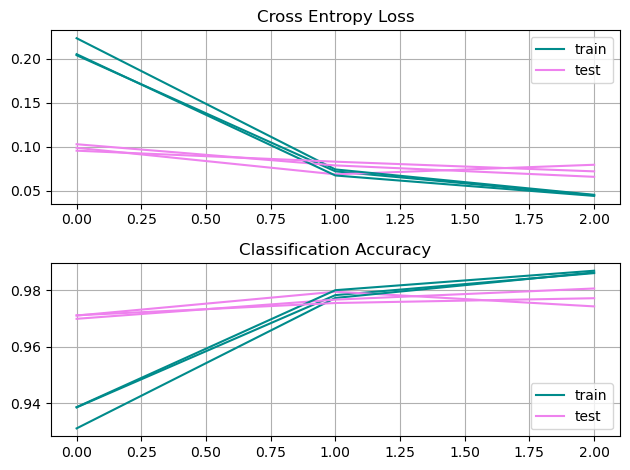

Accuracy: mean=97.738 std=0.260, n=3


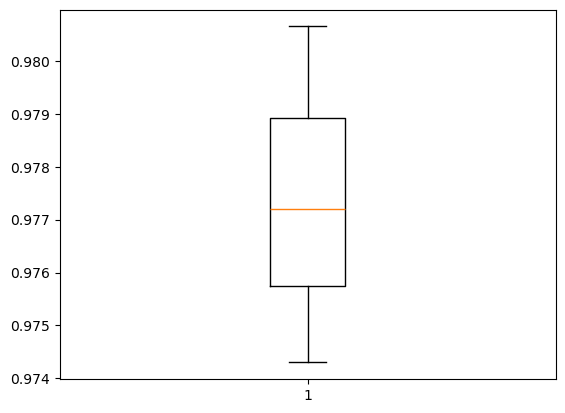

[codecarbon INFO @ 17:06:26] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:06:26] Energy consumed for RAM : 0.000088 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:06:26] Energy consumed for all CPUs : 0.001249 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:06:26] 0.001337 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:06:26] Done!

[codecarbon INFO @ 17:06:26] offline tracker init
[codecarbon INFO @ 17:06:26] [setup] RAM Tracking...
[codecarbon INFO @ 17:06:26] [setup] GPU Tracking...
[codecarbon INFO @ 17:06:26] No GPU found.
[codecarbon INFO @ 17:06:26] [setup] CPU Tracking...
[codecarbon WARNING @ 17:06:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 17:06:28] We saw that you have a Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:06:28] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-7360U C

Epoch 1/3
1250/1250 - 12s - 10ms/step - accuracy: 0.9341 - loss: 0.2133 - val_accuracy: 0.9672 - val_loss: 0.1079
Epoch 2/3


[codecarbon INFO @ 17:06:43] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:06:43] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:06:43] 0.000190 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9783 - loss: 0.0716 - val_accuracy: 0.9764 - val_loss: 0.0768
Epoch 3/3


[codecarbon INFO @ 17:06:58] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:06:58] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:06:58] 0.000379 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9868 - loss: 0.0432 - val_accuracy: 0.9795 - val_loss: 0.0679
625/625 - 2s - 3ms/step - accuracy: 0.9795 - loss: 0.0679
> 97.9500
Epoch 1/3


[codecarbon INFO @ 17:07:13] Energy consumed for RAM : 0.000037 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:07:13] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:07:13] 0.000569 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9346 - loss: 0.2141 - val_accuracy: 0.9718 - val_loss: 0.0955
Epoch 2/3
1250/1250 - 11s - 9ms/step - accuracy: 0.9791 - loss: 0.0698 - val_accuracy: 0.9734 - val_loss: 0.0886
Epoch 3/3


[codecarbon INFO @ 17:07:28] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:07:28] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:07:28] 0.000758 kWh of electricity used since the beginning.


1250/1250 - 11s - 8ms/step - accuracy: 0.9852 - loss: 0.0459 - val_accuracy: 0.9815 - val_loss: 0.0630
625/625 - 2s - 3ms/step - accuracy: 0.9815 - loss: 0.0630
> 98.1450
Epoch 1/3


[codecarbon INFO @ 17:07:43] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:07:43] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:07:43] 0.000948 kWh of electricity used since the beginning.


1250/1250 - 13s - 11ms/step - accuracy: 0.9284 - loss: 0.2368 - val_accuracy: 0.9609 - val_loss: 0.1330
Epoch 2/3


[codecarbon INFO @ 17:07:58] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:07:58] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:07:58] 0.001137 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:08:13] Energy consumed for RAM : 0.000087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:08:13] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:08:13] 0.001327 kWh of electricity used since the beginning.


1250/1250 - 25s - 20ms/step - accuracy: 0.9747 - loss: 0.0830 - val_accuracy: 0.9764 - val_loss: 0.0794
Epoch 3/3


[codecarbon INFO @ 17:08:28] Energy consumed for RAM : 0.000100 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:08:28] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:08:28] 0.001517 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9849 - loss: 0.0508 - val_accuracy: 0.9792 - val_loss: 0.0659
625/625 - 2s - 3ms/step - accuracy: 0.9792 - loss: 0.0659
> 97.9200


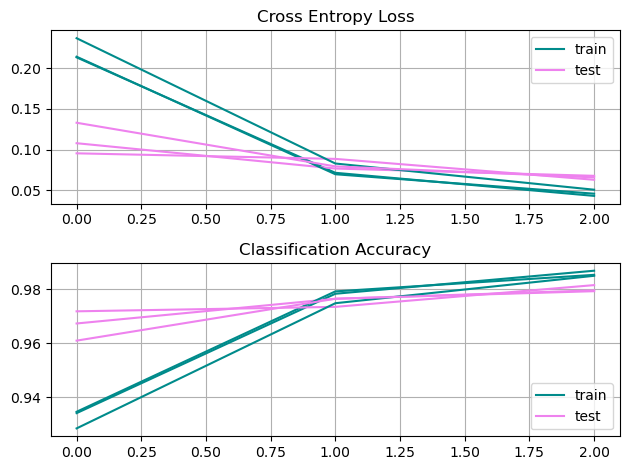

Accuracy: mean=98.005 std=0.100, n=3


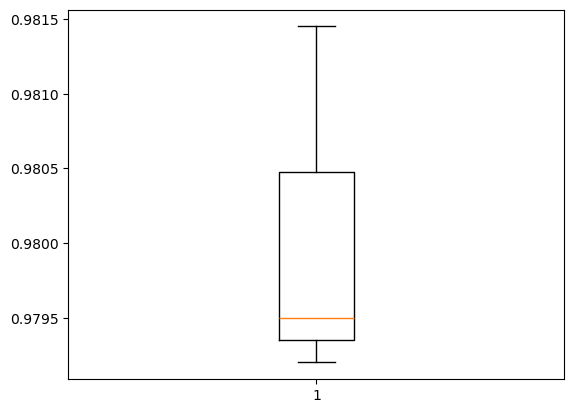

[codecarbon INFO @ 17:08:31] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:08:31] Energy consumed for RAM : 0.000103 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:08:31] Energy consumed for all CPUs : 0.001457 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:08:31] 0.001560 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:08:31] Done!

[codecarbon INFO @ 17:08:31] offline tracker init
[codecarbon INFO @ 17:08:31] [setup] RAM Tracking...
[codecarbon INFO @ 17:08:31] [setup] GPU Tracking...
[codecarbon INFO @ 17:08:31] No GPU found.
[codecarbon INFO @ 17:08:31] [setup] CPU Tracking...
[codecarbon WARNING @ 17:08:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 17:08:33] We saw that you have a Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:08:33] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-7360U C

Epoch 1/3
1250/1250 - 13s - 11ms/step - accuracy: 0.9378 - loss: 0.2049 - val_accuracy: 0.9722 - val_loss: 0.0917
Epoch 2/3


[codecarbon INFO @ 17:08:48] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:08:48] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:08:48] 0.000190 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9789 - loss: 0.0694 - val_accuracy: 0.9737 - val_loss: 0.0869
Epoch 3/3


[codecarbon INFO @ 17:09:03] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:09:03] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:09:03] 0.000379 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9872 - loss: 0.0419 - val_accuracy: 0.9815 - val_loss: 0.0586
625/625 - 2s - 3ms/step - accuracy: 0.9815 - loss: 0.0586
> 98.1450
Epoch 1/3


[codecarbon INFO @ 17:09:18] Energy consumed for RAM : 0.000038 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:09:18] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:09:18] 0.000569 kWh of electricity used since the beginning.


1250/1250 - 12s - 10ms/step - accuracy: 0.9396 - loss: 0.1967 - val_accuracy: 0.9740 - val_loss: 0.0875
Epoch 2/3


[codecarbon INFO @ 17:09:33] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:09:33] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:09:33] 0.000758 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9800 - loss: 0.0660 - val_accuracy: 0.9786 - val_loss: 0.0710
Epoch 3/3
1250/1250 - 11s - 9ms/step - accuracy: 0.9872 - loss: 0.0413 - val_accuracy: 0.9798 - val_loss: 0.0671
625/625 - 2s - 3ms/step - accuracy: 0.9798 - loss: 0.0671
> 97.9800
Epoch 1/3


[codecarbon INFO @ 17:09:48] Energy consumed for RAM : 0.000063 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:09:48] Energy consumed for all CPUs : 0.000886 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:09:48] 0.000948 kWh of electricity used since the beginning.


1250/1250 - 12s - 9ms/step - accuracy: 0.9415 - loss: 0.1938 - val_accuracy: 0.9683 - val_loss: 0.1035
Epoch 2/3


[codecarbon INFO @ 17:10:03] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:10:03] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:10:03] 0.001138 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9804 - loss: 0.0671 - val_accuracy: 0.9770 - val_loss: 0.0743
Epoch 3/3


[codecarbon INFO @ 17:10:18] Energy consumed for RAM : 0.000087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:10:18] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:10:18] 0.001327 kWh of electricity used since the beginning.


1250/1250 - 11s - 9ms/step - accuracy: 0.9873 - loss: 0.0425 - val_accuracy: 0.9819 - val_loss: 0.0570
625/625 - 2s - 3ms/step - accuracy: 0.9819 - loss: 0.0570
> 98.1850


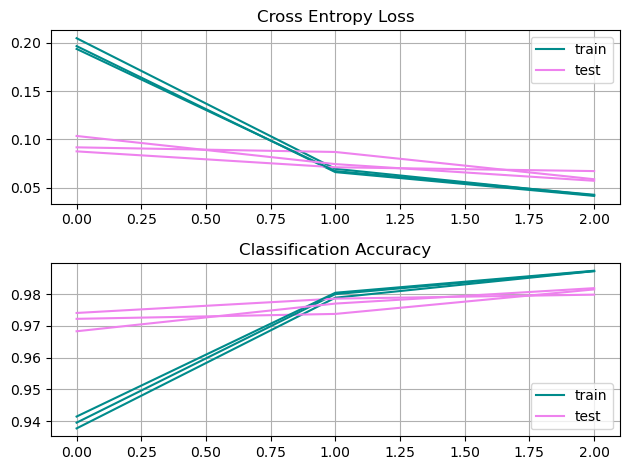

Accuracy: mean=98.103 std=0.089, n=3


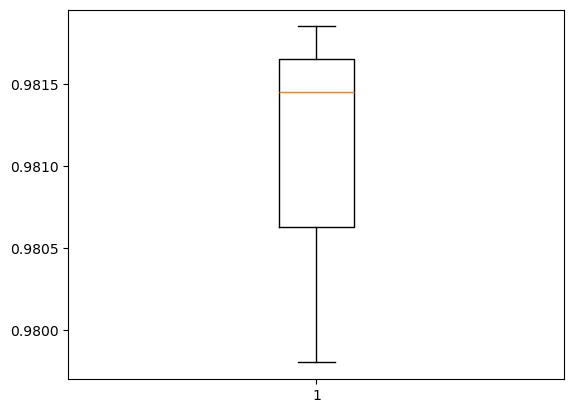

[codecarbon INFO @ 17:10:26] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:10:26] Energy consumed for RAM : 0.000094 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:10:26] Energy consumed for all CPUs : 0.001328 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:10:26] 0.001422 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:10:26] Done!



In [9]:
# cnn model without batch normalization for mnist

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=3):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=42)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=3, batch_size=32, validation_data=(testX, testY), verbose=2)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=2)
		print('> %.4f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.tight_layout()
		plt.subplot(2, 1, 1)
		plt.grid()
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_loss'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="upper right")
		
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.grid()
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="lower right")
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# save model performance to file
def save_performance_to_csv(scores):
	# print summary
	with open ("accuracy_scores.csv",'a') as f:
		data = ["DAMI II Project CPU TF WITHOUT BATCH NORM.", round(mean(scores)*100, 3), round(std(scores)*100, 3)]
		writer = csv.writer(f)
		writer.writerow(data)


# run the test harness for evaluating a model

@track_emissions(offline=True, country_iso_code="ITA", project_name = "DAMI II Project CPU TF WITHOUT BATCH NORM.")
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
	# print accuracy scores to csv
	save_performance_to_csv(scores)


# run the test harness three times
i=0
while i<3:
	run_test_harness()
	i+=1

## 3 - Computing resources: Local vs Cloud

The original CNN architecture (with batch normalization and tensorflow backend) was tested on cloud using Google Colab. Both CPU and GPU performance were tested. The code run and results are available in the notebook files "DAMI_II_Project_Colab_CPU.ipynb" and "DAMI_II_Project_Colab_GPU.ipynb". Emissions and accuracy scores are available in the files "accuracy_scores_cpu_colab.csv", "accuracy_scores_gpu_colab.csv", "emissions_cpu_colab.csv", "emissions_gpu_colab.csv".

## 4 - Deep learning frameworks: Tensorflow vs Pytorch

The original CNN architecture is tested using Pytorch and not Tensorflow as backend for Keras. 

In [10]:
# Switching Keras backend from Tensorflow to Pytorch
import os
import torch
os.environ["KERAS_BACKEND"] = "torch"
from importlib import reload
import keras_core
reload(K)
print(torch.__version__) 
print(keras_core.backend.backend())

Using PyTorch backend.
1.13.1
torch


[codecarbon INFO @ 17:10:34] offline tracker init
[codecarbon INFO @ 17:10:34] [setup] RAM Tracking...
[codecarbon INFO @ 17:10:34] [setup] GPU Tracking...
[codecarbon INFO @ 17:10:34] No GPU found.
[codecarbon INFO @ 17:10:34] [setup] CPU Tracking...
[codecarbon WARNING @ 17:10:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 17:10:36] We saw that you have a Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:10:36] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
[codecarbon INFO @ 17:10:36] >>> Tracker's metadata:
[codecarbon INFO @ 17:10:36]   Platform system: macOS-11.6.5-x86_64-i386-64bit
[codecarbon INFO @ 17:10:36]   Python version: 3.11.0
[codecarbon INFO @ 17:10:36]   CodeCarbon version: 2.3.2
[codecarbon INFO @ 17:10:36]   Available RAM : 8.000 GB
[codecarbon INFO @ 17:10:36]   CPU count: 4
[codecarbon INFO @ 17:10:36]   CPU model: Intel(R) Core(TM) i5-

Epoch 1/3


[codecarbon INFO @ 17:10:51] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:10:51] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:10:51] 0.000190 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9535 - loss: 0.1573 - val_accuracy: 0.9740 - val_loss: 0.0848
Epoch 2/3


[codecarbon INFO @ 17:11:06] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:11:06] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:11:06] 0.000379 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9800 - loss: 0.0651 - val_accuracy: 0.9782 - val_loss: 0.0697
Epoch 3/3


[codecarbon INFO @ 17:11:21] Energy consumed for RAM : 0.000038 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:11:21] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:11:21] 0.000569 kWh of electricity used since the beginning.


1250/1250 - 16s - 13ms/step - accuracy: 0.9877 - loss: 0.0397 - val_accuracy: 0.9832 - val_loss: 0.0615
625/625 - 2s - 3ms/step - accuracy: 0.9832 - loss: 0.0615
> 98.315
Epoch 1/3


[codecarbon INFO @ 17:11:36] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:11:36] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:11:36] 0.000758 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9540 - loss: 0.1576 - val_accuracy: 0.9630 - val_loss: 0.1185
Epoch 2/3


[codecarbon INFO @ 17:11:51] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:11:51] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:11:51] 0.000948 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9831 - loss: 0.0566 - val_accuracy: 0.9655 - val_loss: 0.1146
Epoch 3/3


[codecarbon INFO @ 17:12:06] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:12:06] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:12:06] 0.001138 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:12:21] Energy consumed for RAM : 0.000087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:12:21] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:12:21] 0.001327 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 0.9800 - val_loss: 0.0634
625/625 - 2s - 3ms/step - accuracy: 0.9800 - loss: 0.0634
> 97.995
Epoch 1/3


[codecarbon INFO @ 17:12:36] Energy consumed for RAM : 0.000100 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:12:36] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:12:36] 0.001517 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9528 - loss: 0.1629 - val_accuracy: 0.9775 - val_loss: 0.0799
Epoch 2/3


[codecarbon INFO @ 17:12:51] Energy consumed for RAM : 0.000112 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:12:51] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:12:51] 0.001706 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9813 - loss: 0.0627 - val_accuracy: 0.9818 - val_loss: 0.0611
Epoch 3/3


[codecarbon INFO @ 17:13:06] Energy consumed for RAM : 0.000125 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:13:06] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:13:06] 0.001896 kWh of electricity used since the beginning.


1250/1250 - 17s - 14ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9742 - val_loss: 0.0858
625/625 - 2s - 3ms/step - accuracy: 0.9742 - loss: 0.0858
> 97.420


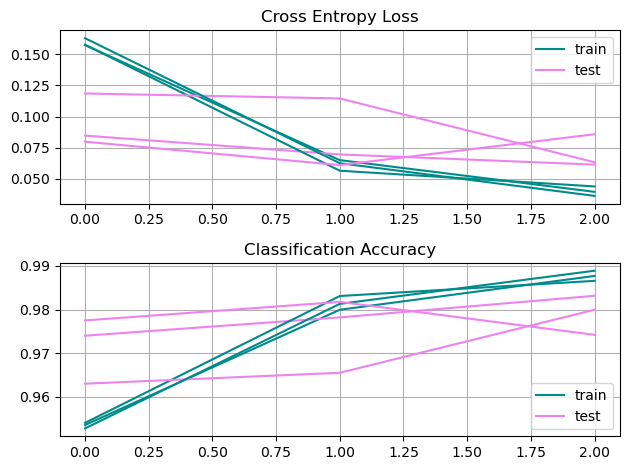

Accuracy: mean=97.910 std=0.370, n=3


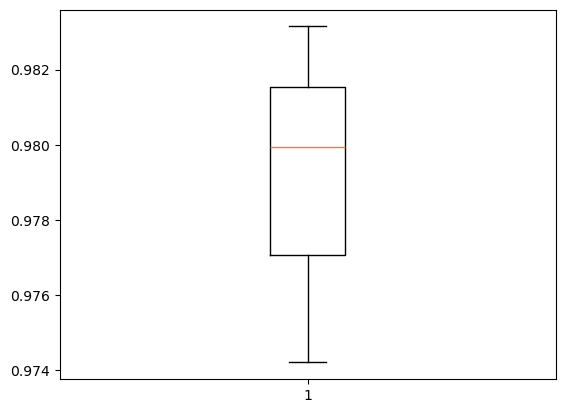

[codecarbon INFO @ 17:13:17] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:13:17] Energy consumed for RAM : 0.000135 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:13:17] Energy consumed for all CPUs : 0.001908 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:13:17] 0.002043 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:13:17] Done!

[codecarbon INFO @ 17:13:17] offline tracker init
[codecarbon INFO @ 17:13:17] [setup] RAM Tracking...
[codecarbon INFO @ 17:13:17] [setup] GPU Tracking...
[codecarbon INFO @ 17:13:17] No GPU found.
[codecarbon INFO @ 17:13:17] [setup] CPU Tracking...
[codecarbon WARNING @ 17:13:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 17:13:19] We saw that you have a Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:13:19] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-7360U C

Epoch 1/3


[codecarbon INFO @ 17:13:34] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:13:34] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:13:34] 0.000190 kWh of electricity used since the beginning.


1250/1250 - 17s - 14ms/step - accuracy: 0.9513 - loss: 0.1627 - val_accuracy: 0.9717 - val_loss: 0.0942
Epoch 2/3


[codecarbon INFO @ 17:13:49] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:13:49] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:13:49] 0.000379 kWh of electricity used since the beginning.


1250/1250 - 17s - 13ms/step - accuracy: 0.9789 - loss: 0.0670 - val_accuracy: 0.9778 - val_loss: 0.0746
Epoch 3/3


[codecarbon INFO @ 17:14:04] Energy consumed for RAM : 0.000037 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:14:04] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:14:04] 0.000569 kWh of electricity used since the beginning.


1250/1250 - 21s - 17ms/step - accuracy: 0.9868 - loss: 0.0428 - val_accuracy: 0.9589 - val_loss: 0.1420
625/625 - 2s - 3ms/step - accuracy: 0.9589 - loss: 0.1420
> 95.895
Epoch 1/3


[codecarbon INFO @ 17:14:19] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:14:19] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:14:19] 0.000758 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:14:34] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:14:34] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:14:34] 0.000948 kWh of electricity used since the beginning.


1250/1250 - 19s - 15ms/step - accuracy: 0.9522 - loss: 0.1602 - val_accuracy: 0.9642 - val_loss: 0.1202
Epoch 2/3


[codecarbon INFO @ 17:14:49] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:14:49] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:14:49] 0.001137 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9766 - val_loss: 0.0798
Epoch 3/3


[codecarbon INFO @ 17:15:04] Energy consumed for RAM : 0.000087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:15:04] Energy consumed for all CPUs : 0.001239 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:15:04] 0.001327 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9883 - loss: 0.0386 - val_accuracy: 0.9809 - val_loss: 0.0656
625/625 - 2s - 3ms/step - accuracy: 0.9809 - loss: 0.0656
> 98.095
Epoch 1/3


[codecarbon INFO @ 17:15:19] Energy consumed for RAM : 0.000100 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:15:19] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:15:19] 0.001517 kWh of electricity used since the beginning.


1250/1250 - 19s - 15ms/step - accuracy: 0.9480 - loss: 0.1760 - val_accuracy: 0.9720 - val_loss: 0.0970
Epoch 2/3


[codecarbon INFO @ 17:15:34] Energy consumed for RAM : 0.000112 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:15:34] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:15:34] 0.001706 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:15:49] Energy consumed for RAM : 0.000125 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:15:49] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:15:49] 0.001896 kWh of electricity used since the beginning.


1250/1250 - 18s - 14ms/step - accuracy: 0.9808 - loss: 0.0665 - val_accuracy: 0.9686 - val_loss: 0.1013
Epoch 3/3


[codecarbon INFO @ 17:16:04] Energy consumed for RAM : 0.000137 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:16:04] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:16:04] 0.002085 kWh of electricity used since the beginning.


1250/1250 - 24s - 19ms/step - accuracy: 0.9892 - loss: 0.0375 - val_accuracy: 0.9813 - val_loss: 0.0581
625/625 - 2s - 3ms/step - accuracy: 0.9813 - loss: 0.0581
> 98.130


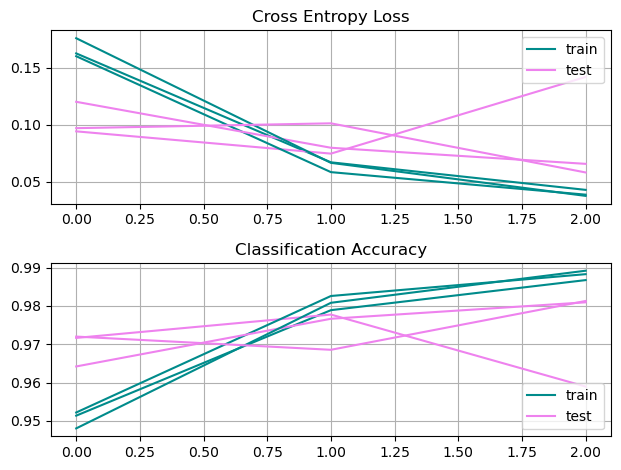

Accuracy: mean=97.373 std=1.045, n=3


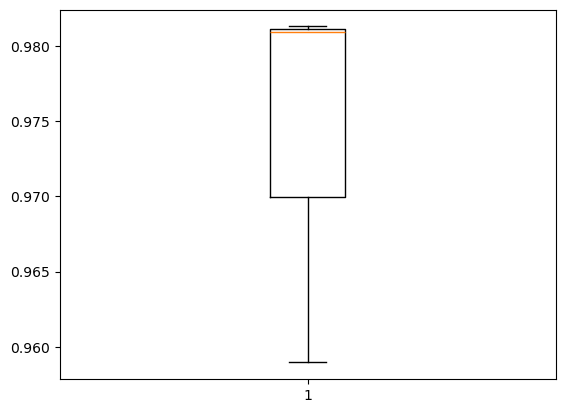

[codecarbon INFO @ 17:16:18] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:16:18] Energy consumed for RAM : 0.000149 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:16:18] Energy consumed for all CPUs : 0.002109 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:16:18] 0.002258 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:16:18] Done!

[codecarbon INFO @ 17:16:18] offline tracker init
[codecarbon INFO @ 17:16:18] [setup] RAM Tracking...
[codecarbon INFO @ 17:16:18] [setup] GPU Tracking...
[codecarbon INFO @ 17:16:18] No GPU found.
[codecarbon INFO @ 17:16:18] [setup] CPU Tracking...
[codecarbon WARNING @ 17:16:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 17:16:20] We saw that you have a Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:16:20] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-7360U C

Epoch 1/3


[codecarbon INFO @ 17:16:35] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:16:35] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:16:35] 0.000190 kWh of electricity used since the beginning.


1250/1250 - 28s - 23ms/step - accuracy: 0.9503 - loss: 0.1694 - val_accuracy: 0.9765 - val_loss: 0.0793
Epoch 2/3


[codecarbon INFO @ 17:16:50] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:16:50] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:16:50] 0.000379 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:17:05] Energy consumed for RAM : 0.000037 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:17:05] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:17:05] 0.000569 kWh of electricity used since the beginning.


1250/1250 - 23s - 18ms/step - accuracy: 0.9812 - loss: 0.0602 - val_accuracy: 0.9625 - val_loss: 0.1235
Epoch 3/3


[codecarbon INFO @ 17:17:20] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:17:20] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:17:20] 0.000758 kWh of electricity used since the beginning.


1250/1250 - 20s - 16ms/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.9800 - val_loss: 0.0722
625/625 - 3s - 4ms/step - accuracy: 0.9800 - loss: 0.0722
> 98.000


[codecarbon INFO @ 17:17:35] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:17:35] Energy consumed for all CPUs : 0.000886 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:17:35] 0.000948 kWh of electricity used since the beginning.


Epoch 1/3


[codecarbon INFO @ 17:17:50] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:17:50] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:17:50] 0.001138 kWh of electricity used since the beginning.


1250/1250 - 22s - 18ms/step - accuracy: 0.9533 - loss: 0.1585 - val_accuracy: 0.9751 - val_loss: 0.0844
Epoch 2/3


[codecarbon INFO @ 17:18:05] Energy consumed for RAM : 0.000087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:18:05] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:18:05] 0.001327 kWh of electricity used since the beginning.


1250/1250 - 18s - 15ms/step - accuracy: 0.9787 - loss: 0.0695 - val_accuracy: 0.9787 - val_loss: 0.0730
Epoch 3/3


[codecarbon INFO @ 17:18:20] Energy consumed for RAM : 0.000100 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:18:20] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:18:20] 0.001517 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:18:35] Energy consumed for RAM : 0.000112 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:18:35] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:18:35] 0.001706 kWh of electricity used since the beginning.


1250/1250 - 20s - 16ms/step - accuracy: 0.9862 - loss: 0.0430 - val_accuracy: 0.9811 - val_loss: 0.0615
625/625 - 2s - 4ms/step - accuracy: 0.9811 - loss: 0.0615
> 98.110
Epoch 1/3


[codecarbon INFO @ 17:18:50] Energy consumed for RAM : 0.000125 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:18:50] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:18:50] 0.001896 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:19:05] Energy consumed for RAM : 0.000137 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:19:05] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:19:05] 0.002085 kWh of electricity used since the beginning.


1250/1250 - 32s - 25ms/step - accuracy: 0.9493 - loss: 0.1679 - val_accuracy: 0.9728 - val_loss: 0.0912
Epoch 2/3


[codecarbon INFO @ 17:19:20] Energy consumed for RAM : 0.000150 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:19:20] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:19:20] 0.002275 kWh of electricity used since the beginning.


1250/1250 - 22s - 18ms/step - accuracy: 0.9808 - loss: 0.0641 - val_accuracy: 0.9763 - val_loss: 0.0760
Epoch 3/3


[codecarbon INFO @ 17:19:35] Energy consumed for RAM : 0.000162 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:19:35] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:19:35] 0.002464 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:19:50] Energy consumed for RAM : 0.000175 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:19:50] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:19:50] 0.002654 kWh of electricity used since the beginning.


1250/1250 - 22s - 18ms/step - accuracy: 0.9882 - loss: 0.0381 - val_accuracy: 0.9808 - val_loss: 0.0623
625/625 - 2s - 4ms/step - accuracy: 0.9808 - loss: 0.0623
> 98.080


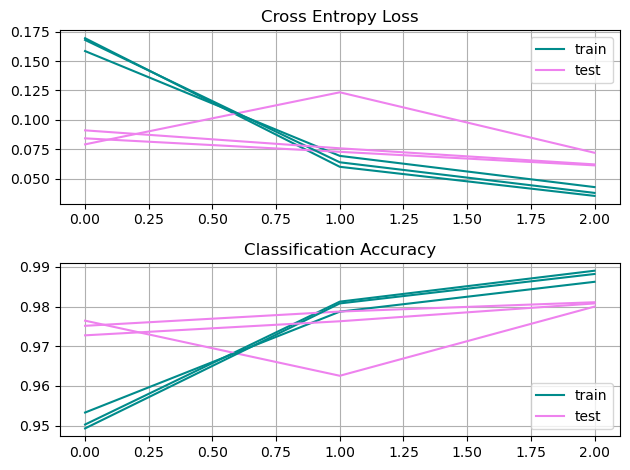

Accuracy: mean=98.063 std=0.046, n=3


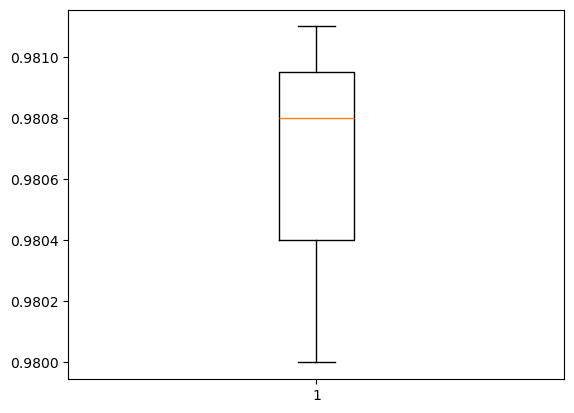

[codecarbon INFO @ 17:19:58] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:19:58] Energy consumed for RAM : 0.000182 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:19:58] Energy consumed for all CPUs : 0.002573 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:19:58] 0.002755 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:19:58] Done!



In [11]:
# cnn model with batch normalization for mnist

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=3):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=42)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=3, batch_size=32, validation_data=(testX, testY), verbose=2)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=2)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.tight_layout()
		plt.subplot(2, 1, 1)
		plt.grid()
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_loss'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="upper right")
		
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.grid()
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="lower right")
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# save model performance to file
def save_performance_to_csv(scores):
	# print summary
	with open ("accuracy_scores.csv",'a') as f:
		data = ["DAMI II Project CPU TORCH", round(mean(scores)*100, 3), round(std(scores)*100, 3)]
		writer = csv.writer(f)
		writer.writerow(data)


# run the test harness for evaluating a model

@track_emissions(offline=True, country_iso_code="ITA", project_name = "DAMI II Project CPU TORCH")
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
	# print accuracy scores to csv
	save_performance_to_csv(scores)

# run the test harness three times
i=0
while i<3:
	run_test_harness()
	i+=1

## 5 - Results

Emissions and accuracy results recorded while running the CNN in various configurations are here analysed.

In [94]:
import pandas as pd

In [95]:
df1 = pd.read_csv("emissions_19_12.csv")
df1

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2023-12-19T16:59:11,DAMI II Project CPU TF,ee9dc0b5-a324-48c9-b12c-8b6e23bf57ae,165.966053,0.000715,0.000004,42.5,0.0,3.0,0.001959,...,4,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,NaN,NaN,NaN,NaN,8.0,machine,N,1.0
1,2023-12-19T17:01:54,DAMI II Project CPU TF,52c73d69-d5ea-4fec-86b0-d4f32b92e22e,160.915748,0.000693,0.000004,42.5,0.0,3.0,0.001899,...,4,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,NaN,NaN,NaN,NaN,8.0,machine,N,1.0
2,2023-12-19T17:04:38,DAMI II Project CPU TF,fcc46081-db66-41c3-b458-b9d13817c447,162.331238,0.000699,0.000004,42.5,0.0,3.0,0.001916,...,4,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,NaN,NaN,NaN,NaN,8.0,machine,N,1.0
3,2023-12-19T17:06:26,DAMI II Project CPU TF WITHOUT BATCH NORM.,1744ea8d-19e2-412e-beb7-898744c6e27e,105.867137,0.000456,0.000004,42.5,0.0,3.0,0.001249,...,4,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,NaN,NaN,NaN,NaN,8.0,machine,N,1.0
4,2023-12-19T17:08:31,DAMI II Project CPU TF WITHOUT BATCH NORM.,74280b74-c687-47be-bf19-0a1f95151164,123.454106,0.000532,0.000004,42.5,0.0,3.0,0.001457,...,4,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,NaN,NaN,NaN,NaN,8.0,machine,N,1.0
5,2023-12-19T17:10:26,DAMI II Project CPU TF WITHOUT BATCH NORM.,017a9eee-2667-4828-bef2-1a16a416be11,112.540439,0.000485,0.000004,42.5,0.0,3.0,0.001328,...,4,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,NaN,NaN,NaN,NaN,8.0,machine,N,1.0
6,2023-12-19T17:13:17,DAMI II Project CPU TORCH,313954cd-fb32-42b6-84da-e2689f9de3ea,161.643142,0.000696,0.000004,42.5,0.0,3.0,0.001908,...,4,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,NaN,NaN,NaN,NaN,8.0,machine,N,1.0
7,2023-12-19T17:16:18,DAMI II Project CPU TORCH,1f9e5387-5df8-4596-9f36-190a9f077291,178.696865,0.000769,0.000004,42.5,0.0,3.0,0.002109,...,4,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,NaN,NaN,NaN,NaN,8.0,machine,N,1.0
8,2023-12-19T17:19:58,DAMI II Project CPU TORCH,78f6eca8-142d-4598-a8a9-b985fc98975a,218.024498,0.000939,0.000004,42.5,0.0,3.0,0.002573,...,4,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,NaN,NaN,NaN,NaN,8.0,machine,N,1.0


In [96]:
colnames = ["project_name", "accuracy_score", "accuracy_std"]

df2 = pd.read_csv("accuracy_scores_19_12.csv", header=None, names=colnames)
df2

,project_name,accuracy_score,accuracy_std
0,DAMI II Project CPU TF,97.882,0.401
1,DAMI II Project CPU TF,97.962,0.227
2,DAMI II Project CPU TF,98.100,0.103
3,DAMI II Project CPU TF WITHOUT BATCH NORM.,97.738,0.260
4,DAMI II Project CPU TF WITHOUT BATCH NORM.,98.005,0.100
5,DAMI II Project CPU TF WITHOUT BATCH NORM.,98.103,0.089
6,DAMI II Project CPU TORCH,97.910,0.370
7,DAMI II Project CPU TORCH,97.373,1.045
8,DAMI II Project CPU TORCH,98.063,0.046


In [97]:
df_join1 = pd.merge(df1, df2, left_index=True, right_index=True)
df_join1

,timestamp,project_name_x,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,project_name_y,accuracy_score,accuracy_std
0,2023-12-19T16:59:11,DAMI II Project CPU TF,ee9dc0b5-a324-48c9-b12c-8b6e23bf57ae,165.966053,0.000715,0.000004,42.5,0.0,3.0,0.001959,...,NaN,NaN,NaN,8.0,machine,N,1.0,DAMI II Project CPU TF,97.882,0.401
1,2023-12-19T17:01:54,DAMI II Project CPU TF,52c73d69-d5ea-4fec-86b0-d4f32b92e22e,160.915748,0.000693,0.000004,42.5,0.0,3.0,0.001899,...,NaN,NaN,NaN,8.0,machine,N,1.0,DAMI II Project CPU TF,97.962,0.227
2,2023-12-19T17:04:38,DAMI II Project CPU TF,fcc46081-db66-41c3-b458-b9d13817c447,162.331238,0.000699,0.000004,42.5,0.0,3.0,0.001916,...,NaN,NaN,NaN,8.0,machine,N,1.0,DAMI II Project CPU TF,98.100,0.103
3,2023-12-19T17:06:26,DAMI II Project CPU TF WITHOUT BATCH NORM.,1744ea8d-19e2-412e-beb7-898744c6e27e,105.867137,0.000456,0.000004,42.5,0.0,3.0,0.001249,...,NaN,NaN,NaN,8.0,machine,N,1.0,DAMI II Project CPU TF WITHOUT BATCH NORM.,97.738,0.260
4,2023-12-19T17:08:31,DAMI II Project CPU TF WITHOUT BATCH NORM.,74280b74-c687-47be-bf19-0a1f95151164,123.454106,0.000532,0.000004,42.5,0.0,3.0,0.001457,...,NaN,NaN,NaN,8.0,machine,N,1.0,DAMI II Project CPU TF WITHOUT BATCH NORM.,98.005,0.100
5,2023-12-19T17:10:26,DAMI II Project CPU TF WITHOUT BATCH NORM.,017a9eee-2667-4828-bef2-1a16a416be11,112.540439,0.000485,0.000004,42.5,0.0,3.0,0.001328,...,NaN,NaN,NaN,8.0,machine,N,1.0,DAMI II Project CPU TF WITHOUT BATCH NORM.,98.103,0.089
6,2023-12-19T17:13:17,DAMI II Project CPU TORCH,313954cd-fb32-42b6-84da-e2689f9de3ea,161.643142,0.000696,0.000004,42.5,0.0,3.0,0.001908,...,NaN,NaN,NaN,8.0,machine,N,1.0,DAMI II Project CPU TORCH,97.910,0.370
7,2023-12-19T17:16:18,DAMI II Project CPU TORCH,1f9e5387-5df8-4596-9f36-190a9f077291,178.696865,0.000769,0.000004,42.5,0.0,3.0,0.002109,...,NaN,NaN,NaN,8.0,machine,N,1.0,DAMI II Project CPU TORCH,97.373,1.045
8,2023-12-19T17:19:58,DAMI II Project CPU TORCH,78f6eca8-142d-4598-a8a9-b985fc98975a,218.024498,0.000939,0.000004,42.5,0.0,3.0,0.002573,...,NaN,NaN,NaN,8.0,machine,N,1.0,DAMI II Project CPU TORCH,98.063,0.046


In [98]:
df3 = pd.read_csv("emissions_cpu_colab_25_12.csv")
df3

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2023-12-25T21:03:21,DAMI II Project Colab CPU TF,f55afded-a9b7-49d5-bb27-4e058a3cf2d4,427.636015,0.002127,0.000005,42.5,0.0,4.753046,0.005044,...,2,Intel(R) Xeon(R) CPU @ 2.20GHz,NaN,NaN,NaN,NaN,12.674789,machine,N,1.0
1,2023-12-25T21:10:34,DAMI II Project Colab CPU TF,97560128-0773-4679-8a6e-8f89f93de379,430.894231,0.002143,0.000005,42.5,0.0,4.753046,0.005083,...,2,Intel(R) Xeon(R) CPU @ 2.20GHz,NaN,NaN,NaN,NaN,12.674789,machine,N,1.0
2,2023-12-25T21:17:19,DAMI II Project Colab CPU TF,84679058-7698-4468-9da5-fb7efe8b69ea,403.696351,0.002008,0.000005,42.5,0.0,4.753046,0.004762,...,2,Intel(R) Xeon(R) CPU @ 2.20GHz,NaN,NaN,NaN,NaN,12.674789,machine,N,1.0


In [99]:
df4 = pd.read_csv("emissions_gpu_colab_25_12.csv")
df4

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2023-12-25T20:43:44,DAMI II Project Colab GPU TF,51cb940a-7354-4344-9770-b4478f7909a3,88.208354,0.000733,0.000008,42.5,31.290604,4.753046,0.001041,...,2,Intel(R) Xeon(R) CPU @ 2.00GHz,1,1 x Tesla T4,NaN,NaN,12.674789,machine,N,1.0
1,2023-12-25T20:44:48,DAMI II Project Colab GPU TF,54a67c66-70a6-4676-a1f7-3f1c733abbaa,62.641217,0.000532,0.000008,42.5,28.955645,4.753046,0.000739,...,2,Intel(R) Xeon(R) CPU @ 2.00GHz,1,1 x Tesla T4,NaN,NaN,12.674789,machine,N,1.0
2,2023-12-25T20:45:47,DAMI II Project Colab GPU TF,146d4d95-b5da-4025-aeec-8d7202730c57,57.150823,0.000490,0.000009,42.5,32.514962,4.753046,0.000674,...,2,Intel(R) Xeon(R) CPU @ 2.00GHz,1,1 x Tesla T4,NaN,NaN,12.674789,machine,N,1.0


In [100]:
df5 = pd.read_csv("accuracy_scores_cpu_colab_25_12.csv", header=None, names=colnames)
df5

,project_name,accuracy_score,accuracy_std
0,DAMI II Project Colab CPU TF,98.205,0.121
1,DAMI II Project Colab CPU TF,98.328,0.059
2,DAMI II Project Colab CPU TF,98.308,0.133


In [101]:
df6 = pd.read_csv("accuracy_scores_gpu_colab_25_12.csv", header=None, names=colnames)
df6

,project_name,accuracy_score,accuracy_std
0,DAMI II Project Colab GPU TF,98.308,0.062
1,DAMI II Project Colab GPU TF,98.262,0.166
2,DAMI II Project Colab GPU TF,98.340,0.080


In [102]:
df_join2 = pd.merge(df3, df5, left_index=True, right_index=True).reset_index(drop=True)
df_join2

,timestamp,project_name_x,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,project_name_y,accuracy_score,accuracy_std
0,2023-12-25T21:03:21,DAMI II Project Colab CPU TF,f55afded-a9b7-49d5-bb27-4e058a3cf2d4,427.636015,0.002127,0.000005,42.5,0.0,4.753046,0.005044,...,NaN,NaN,NaN,12.674789,machine,N,1.0,DAMI II Project Colab CPU TF,98.205,0.121
1,2023-12-25T21:10:34,DAMI II Project Colab CPU TF,97560128-0773-4679-8a6e-8f89f93de379,430.894231,0.002143,0.000005,42.5,0.0,4.753046,0.005083,...,NaN,NaN,NaN,12.674789,machine,N,1.0,DAMI II Project Colab CPU TF,98.328,0.059
2,2023-12-25T21:17:19,DAMI II Project Colab CPU TF,84679058-7698-4468-9da5-fb7efe8b69ea,403.696351,0.002008,0.000005,42.5,0.0,4.753046,0.004762,...,NaN,NaN,NaN,12.674789,machine,N,1.0,DAMI II Project Colab CPU TF,98.308,0.133


In [103]:
df_join3 = pd.merge(df4, df6, left_index=True, right_index=True).reset_index(drop=True)
df_join3

,timestamp,project_name_x,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,project_name_y,accuracy_score,accuracy_std
0,2023-12-25T20:43:44,DAMI II Project Colab GPU TF,51cb940a-7354-4344-9770-b4478f7909a3,88.208354,0.000733,0.000008,42.5,31.290604,4.753046,0.001041,...,1 x Tesla T4,NaN,NaN,12.674789,machine,N,1.0,DAMI II Project Colab GPU TF,98.308,0.062
1,2023-12-25T20:44:48,DAMI II Project Colab GPU TF,54a67c66-70a6-4676-a1f7-3f1c733abbaa,62.641217,0.000532,0.000008,42.5,28.955645,4.753046,0.000739,...,1 x Tesla T4,NaN,NaN,12.674789,machine,N,1.0,DAMI II Project Colab GPU TF,98.262,0.166
2,2023-12-25T20:45:47,DAMI II Project Colab GPU TF,146d4d95-b5da-4025-aeec-8d7202730c57,57.150823,0.000490,0.000009,42.5,32.514962,4.753046,0.000674,...,1 x Tesla T4,NaN,NaN,12.674789,machine,N,1.0,DAMI II Project Colab GPU TF,98.340,0.080


In [104]:
frames = [df_join1, df_join2, df_join3]
df = pd.concat(frames).reset_index(drop=True)
df

,timestamp,project_name_x,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,project_name_y,accuracy_score,accuracy_std
0,2023-12-19T16:59:11,DAMI II Project CPU TF,ee9dc0b5-a324-48c9-b12c-8b6e23bf57ae,165.966053,0.000715,0.000004,42.5,0.000000,3.000000,0.001959,...,NaN,NaN,NaN,8.000000,machine,N,1.0,DAMI II Project CPU TF,97.882,0.401
1,2023-12-19T17:01:54,DAMI II Project CPU TF,52c73d69-d5ea-4fec-86b0-d4f32b92e22e,160.915748,0.000693,0.000004,42.5,0.000000,3.000000,0.001899,...,NaN,NaN,NaN,8.000000,machine,N,1.0,DAMI II Project CPU TF,97.962,0.227
2,2023-12-19T17:04:38,DAMI II Project CPU TF,fcc46081-db66-41c3-b458-b9d13817c447,162.331238,0.000699,0.000004,42.5,0.000000,3.000000,0.001916,...,NaN,NaN,NaN,8.000000,machine,N,1.0,DAMI II Project CPU TF,98.100,0.103
3,2023-12-19T17:06:26,DAMI II Project CPU TF WITHOUT BATCH NORM.,1744ea8d-19e2-412e-beb7-898744c6e27e,105.867137,0.000456,0.000004,42.5,0.000000,3.000000,0.001249,...,NaN,NaN,NaN,8.000000,machine,N,1.0,DAMI II Project CPU TF WITHOUT BATCH NORM.,97.738,0.260
4,2023-12-19T17:08:31,DAMI II Project CPU TF WITHOUT BATCH NORM.,74280b74-c687-47be-bf19-0a1f95151164,123.454106,0.000532,0.000004,42.5,0.000000,3.000000,0.001457,...,NaN,NaN,NaN,8.000000,machine,N,1.0,DAMI II Project CPU TF WITHOUT BATCH NORM.,98.005,0.100
5,2023-12-19T17:10:26,DAMI II Project CPU TF WITHOUT BATCH NORM.,017a9eee-2667-4828-bef2-1a16a416be11,112.540439,0.000485,0.000004,42.5,0.000000,3.000000,0.001328,...,NaN,NaN,NaN,8.000000,machine,N,1.0,DAMI II Project CPU TF WITHOUT BATCH NORM.,98.103,0.089
6,2023-12-19T17:13:17,DAMI II Project CPU TORCH,313954cd-fb32-42b6-84da-e2689f9de3ea,161.643142,0.000696,0.000004,42.5,0.000000,3.000000,0.001908,...,NaN,NaN,NaN,8.000000,machine,N,1.0,DAMI II Project CPU TORCH,97.910,0.370
7,2023-12-19T17:16:18,DAMI II Project CPU TORCH,1f9e5387-5df8-4596-9f36-190a9f077291,178.696865,0.000769,0.000004,42.5,0.000000,3.000000,0.002109,...,NaN,NaN,NaN,8.000000,machine,N,1.0,DAMI II Project CPU TORCH,97.373,1.045
8,2023-12-19T17:19:58,DAMI II Project CPU TORCH,78f6eca8-142d-4598-a8a9-b985fc98975a,218.024498,0.000939,0.000004,42.5,0.000000,3.000000,0.002573,...,NaN,NaN,NaN,8.000000,machine,N,1.0,DAMI II Project CPU TORCH,98.063,0.046
9,2023-12-25T21:03:21,DAMI II Project Colab CPU TF,f55afded-a9b7-49d5-bb27-4e058a3cf2d4,427.636015,0.002127,0.000005,42.5,0.000000,4.753046,0.005044,...,NaN,NaN,NaN,12.674789,machine,N,1.0,DAMI II Project Colab CPU TF,98.205,0.121


In [105]:
df.columns

Index(['timestamp', 'project_name_x', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'codecarbon_version', 'cpu_count', 'cpu_model',
       'gpu_count', 'gpu_model', 'longitude', 'latitude', 'ram_total_size',
       'tracking_mode', 'on_cloud', 'pue', 'project_name_y', 'accuracy_score',
       'accuracy_std'],
      dtype='object')

In [106]:
df_fin = df.drop(["project_name_y"], axis=1)
df_fin.columns

Index(['timestamp', 'project_name_x', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'codecarbon_version', 'cpu_count', 'cpu_model',
       'gpu_count', 'gpu_model', 'longitude', 'latitude', 'ram_total_size',
       'tracking_mode', 'on_cloud', 'pue', 'accuracy_score', 'accuracy_std'],
      dtype='object')

In [107]:
df_fin.to_csv("results_overview.csv", index=False)

In [108]:
min_e = df_fin["emissions"].min()
min_e
mod_min_e = df_fin["project_name_x"][df["emissions"]==min_e]
print(round(min_e*1000,2), mod_min_e)


0.46 3    DAMI II Project CPU TF WITHOUT BATCH NORM.
Name: project_name_x, dtype: object


In [109]:
max_e = df_fin["emissions"].max()
max_e
mod_max_e = df_fin["project_name_x"][df["emissions"]==max_e]
print(round(max_e*1000,2), mod_max_e)

2.14 10    DAMI II Project Colab CPU TF
Name: project_name_x, dtype: object


In [110]:
prop = round(max_e/min_e, 1)
prop

4.7

In [111]:
df_fin["configuration"] =  df["project_name_x"].map(lambda x: re.sub(r'DAMI II Project', "", x))

/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

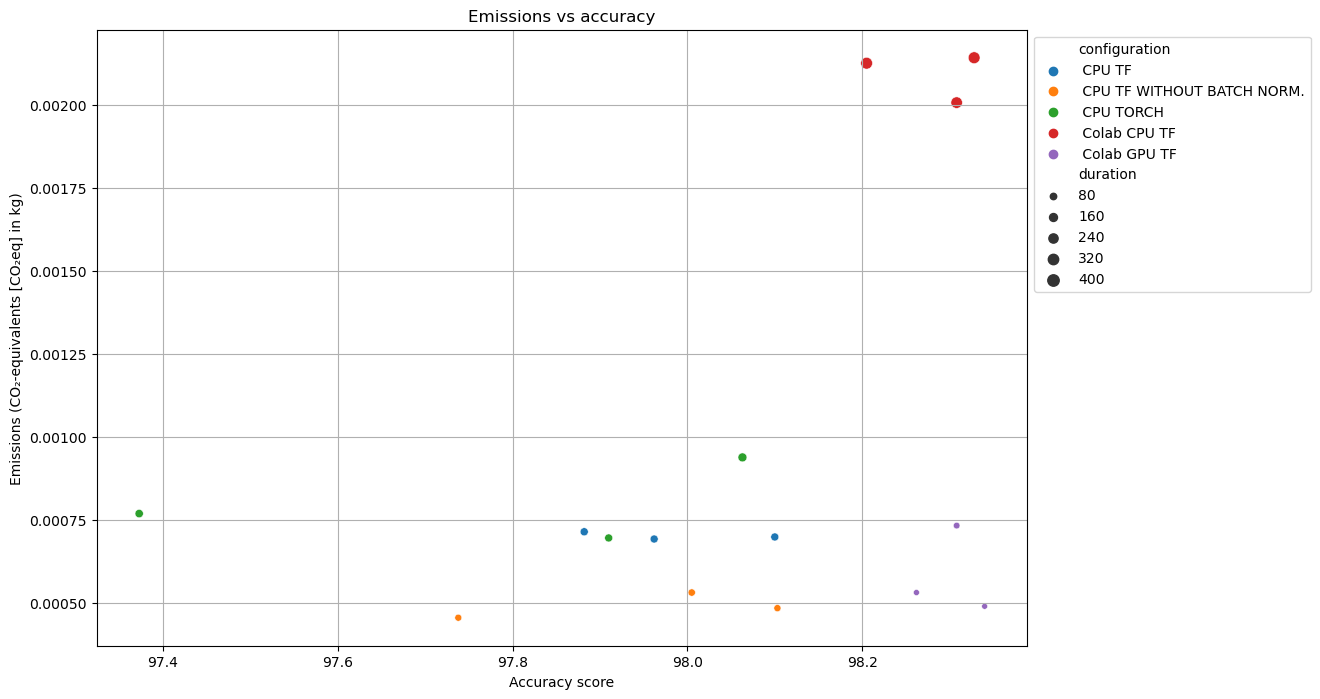

In [112]:
plt.figure(figsize=(12,8))
plt.title("Emissions vs accuracy")
plt.grid()
plt.xlabel("Accuracy score")
plt.ylabel("Emissions (CO₂-equivalents [CO₂eq] in kg)")
sns.scatterplot(data=df_fin, x="accuracy_score", y="emissions", hue="configuration", size = "duration")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

# https://mlco2.github.io/codecarbon/output.html

/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

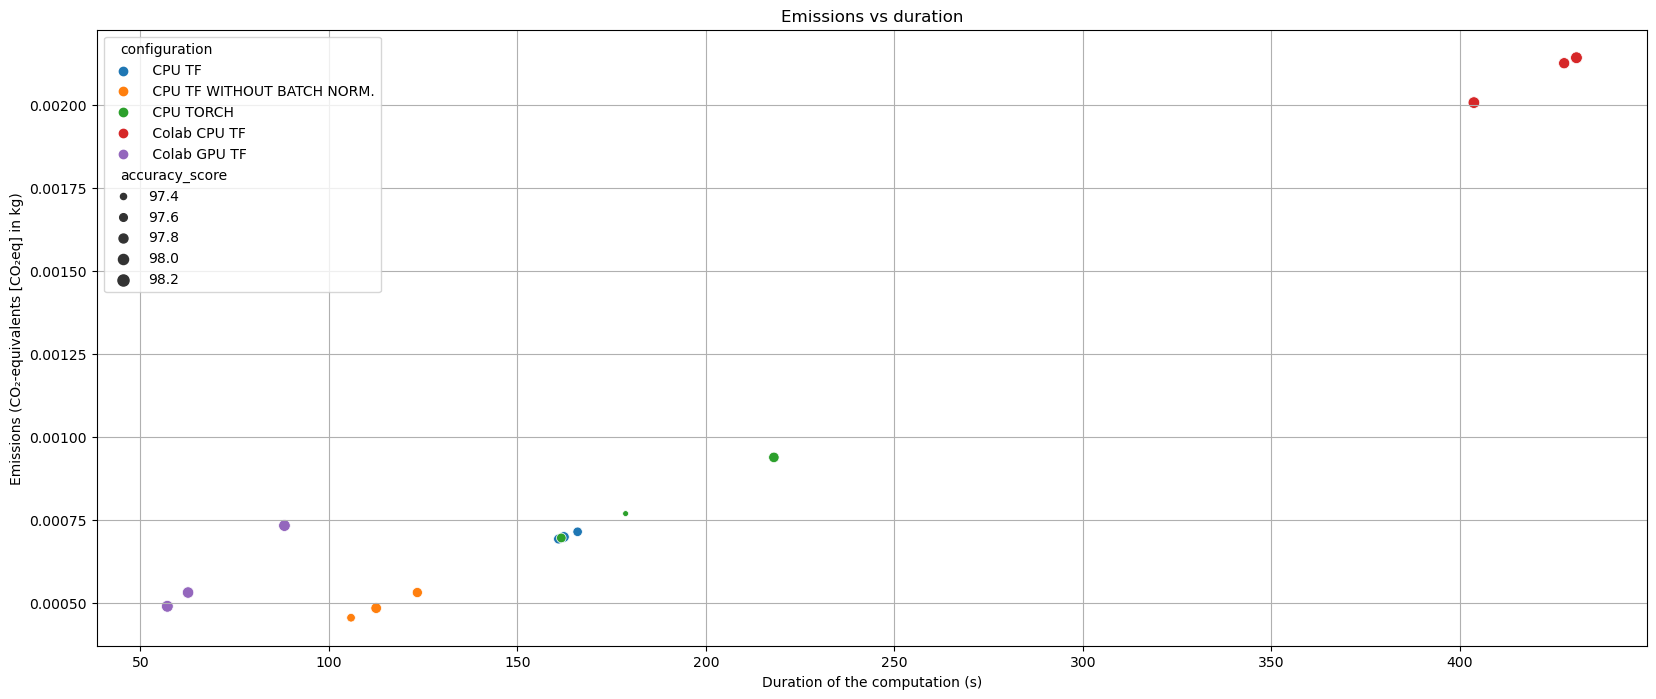

In [113]:
plt.figure(figsize=(20,8))
plt.title("Emissions vs duration")
plt.grid()
plt.xlabel("Duration of the computation (s)")
plt.ylabel("Emissions (CO₂-equivalents [CO₂eq] in kg)")
sns.scatterplot(data=df_fin, x="duration", y="emissions", hue="configuration", size = "accuracy_score" );

# https://mlco2.github.io/codecarbon/output.html

/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giudittaparolini/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

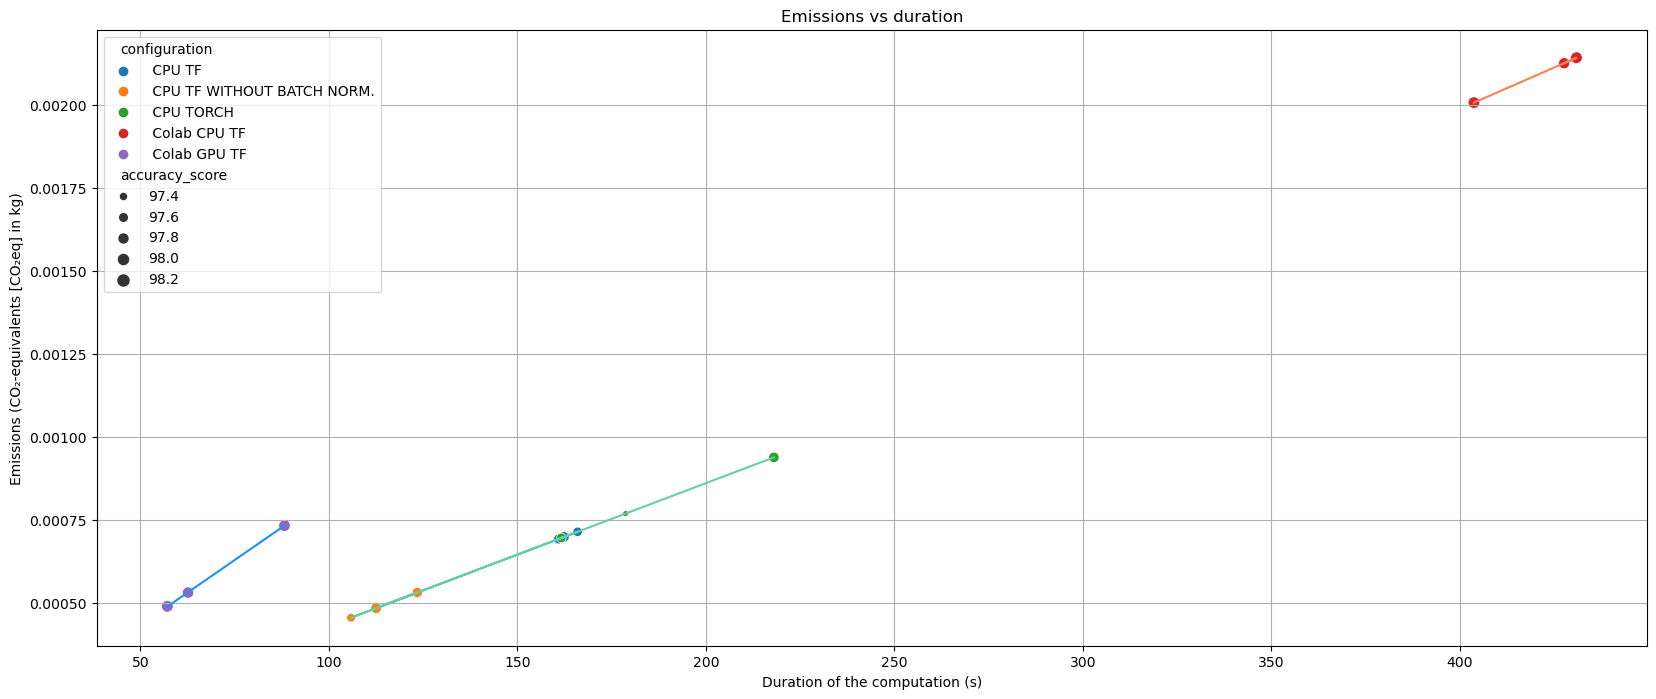

In [123]:
plt.figure(figsize=(20,8))
plt.title("Emissions vs duration")
plt.grid()
plt.xlabel("Duration of the computation (s)")
plt.ylabel("Emissions (CO₂-equivalents [CO₂eq] in kg)")
sns.scatterplot(data=df_fin, x="duration", y="emissions", hue="configuration", size = "accuracy_score" );

from sklearn.linear_model import LinearRegression
import numpy as np

x1 = np.array(df[df["project_name_x"]=="DAMI II Project Colab GPU TF"]["duration"]).reshape(-1,1)
y1 = np.array(df[df["project_name_x"]=="DAMI II Project Colab GPU TF"]["emissions"]).reshape(-1,1)
linreg = LinearRegression().fit(x1,y1)
plt.plot(x1,linreg.intercept_+linreg.coef_*x1, color='dodgerblue')

x2 = np.array(df[df["project_name_x"]=="DAMI II Project Colab CPU TF"]["duration"]).reshape(-1,1)
y2 = np.array(df[df["project_name_x"]=="DAMI II Project Colab CPU TF"]["emissions"]).reshape(-1,1)
linreg = LinearRegression().fit(x2,y2)
plt.plot(x2,linreg.intercept_+linreg.coef_*x2, color='coral')

x3 = np.array(df[(df["project_name_x"]!="DAMI II Project Colab CPU TF") & (df["project_name_x"]!="DAMI II Project Colab GPU TF")]["duration"]).reshape(-1,1)
y3 = np.array(df[(df["project_name_x"]!="DAMI II Project Colab CPU TF") & (df["project_name_x"]!="DAMI II Project Colab GPU TF")]["emissions"]).reshape(-1,1)
linreg = LinearRegression().fit(x3,y3)
plt.plot(x3,linreg.intercept_+linreg.coef_*x3, color='mediumaquamarine')



In [115]:
lst_emissions = df_fin["emissions"].to_list()
sum_emissions = sum(lst_emissions)
sum_emissions_g = round(sum_emissions*1000, 2)
print("CO2Eq Emissions in grams: ", sum_emissions_g)
lst_duration = df_fin["duration"].to_list()
sum_duration = sum(lst_duration)
sum_duration_m = round(sum_duration/60, 1)
print("Total run time (min): ", sum_duration_m)

CO2Eq Emissions in grams:  14.02
Total run time (min):  47.7


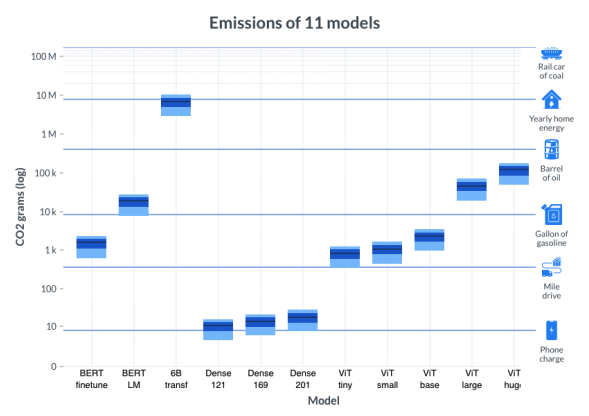

In [116]:
display.Image("emissions_comparison.png")
# Image available at https://mlco2.github.io/codecarbon/model_examples.html